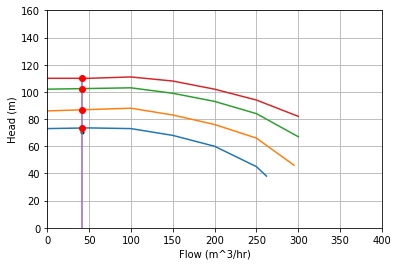

228.0


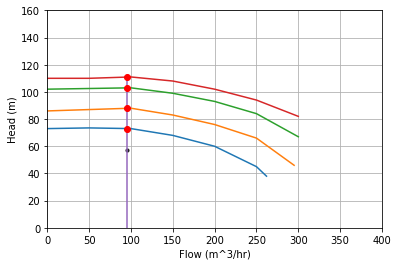

228.0


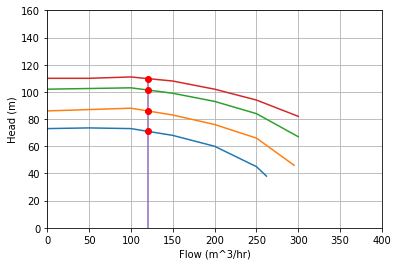

229.33333333333334


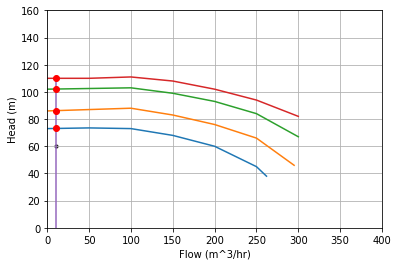

228.0


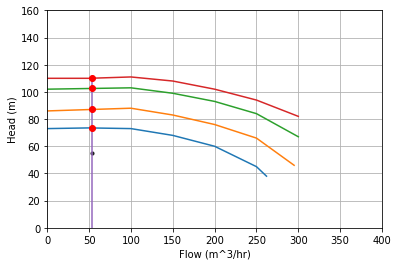

228.0


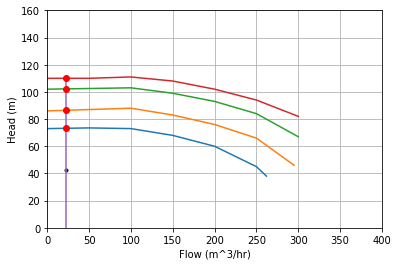

228.0


In [2]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline

from shapely.geometry import LineString        

with open('Data.csv', mode ='r')as file:
    ereader = csv.DictReader(file)
    csvFile = csv.reader(file)
    for lines in csvFile:
        series=lines[0]      # Pump series input
        pole=lines[1]        # RPM input
        a1=lines[2]         
        a= int(a1)
        b1=lines[3]
        b= int(b1)
        x=[]
        y=[]

        x_demo_try=[]
        y_demo_try=[]
        diameters=[]

        rpm_p2=0
        rpm_p4=0

# below logic is for retriving data from CSV File (Series as well as Poles)

        with open('project.csv', mode ='r')as file:
            ereader = csv.DictReader(file)
            csvFile = csv.reader(file)
            count=0
            flag=0
            count_row=7
            for lines in csvFile:
                count_row=count_row+1
                if (lines[0]==series or flag==1) and count!=16 :
                    if int(pole)>2000 and count<=7:
                        count_col=0
                        for demo in lines:
                            count_col=count_col+1
                            if count_col==3 and demo!='':
                                diameters.append(demo)
                            if count_col==2 and count_row%8==0:
                                rpm_p2=int(float(demo))
                            if (demo.isalpha() or demo=='' or demo==series or count_col==3 or count_col==2 or demo=='x1' or demo=='x2' or demo=='x3' or demo=='y1' or demo=='y2' or demo=='y3'):
                                continue
                            temp=demo
                            if(lines[3]=='x' or lines[3]=='x1' or lines[3]=='x2' or lines[3]=='x3' ):
                                x_demo_try.append(temp)
                            if(lines[3]=='y' or lines[3]=='y1' or lines[3]=='y2' or lines[3]=='y3'):
                                y_demo_try.append(temp)
                        
            
            
                    if int(pole)<=2000 and count>=8 and count<=15:
                        count_col=0
                        for demo in lines:
                            count_col=count_col+1
                            if count_col==3 and demo!='':
                                diameters.append(demo)
                            if count_col==2 and count_row%8==0:
                                rpm_p4=int(float(demo))
                            if (demo.isalpha() or demo=='' or demo==series or count_col==3 or count_col==2 or demo=='x1' or demo=='x2' or demo=='x3' or demo=='y1' or demo=='y2' or demo=='y3'):
                        
                                continue
                            else:    
                                temp=demo
                                if(lines[3]=='x' or lines[3]=='x1' or lines[3]=='x2' or lines[3]=='x3' ):
                                    x_demo_try.append(temp)
                                if(lines[3]=='y' or lines[3]=='y1' or lines[3]=='y2' or lines[3]=='y3'):
                                    y_demo_try.append(temp)
            
                    x.append(x_demo_try)
                    x = [i for i in x if i != []]
                    y.append(y_demo_try)
                    y = [i for i in y if i != []]
                    x_demo_try=[]
                    y_demo_try=[]
                    flag=1
                    count=count+1
        
# After retrival of data, data gets stored in x and y array

        temp=[]
        for i in range(0, len(x)):
            temp=x[i]
            for j in range(0, len(temp)):
                temp[j] = float(temp[j])
            x[i]=temp

        for i in range(0, len(y)):
            temp=y[i]
            for j in range(0, len(temp)):
                temp[j] = float(temp[j])
            y[i]=temp

#Points are taken from csv file 

#line 1
        x0= np.array(x[0])
        y0= np.array(y[0])
#line 2
        x1= np.array(x[1])
        y1= np.array(y[1])
#line 3
        x2= np.array(x[2])
        y2= np.array(y[2])
#line 4
        x3= np.array(x[3])
        y3= np.array(y[3])


        c=max(y3)

        plt.xlim(0,400);
        plt.ylim(0,160);


#User input for Flow and Head
        a_copy=a
        b_copy=b

#Coverting a and b if rpm is different than 2Pole and 4Pole
        if (int(pole) != int(rpm_p2)) or (int(pole) != int(rpm_p4)):
            if(int(pole)>2000):
                a = a  *  int(rpm_p2) / int(pole)
                b = b  *  ((rpm_p2/int(pole)) * (rpm_p2/int(pole)))
             
            else:
                a = a * float(rpm_p4) / float(pole)
                b = b  *  (( float(rpm_p4) /float(pole)) * (float(rpm_p4)/float(pole)))
        
#vertical intersecting line
        x4=[a,a]
        y4=[0,c]
        
        plt.scatter(a,b,color='black', s=10,alpha=0.8)

        plt.grid()

        plt.ylabel('Head (m)')
        plt.xlabel('Flow (m^3/hr)')

        plt.plot(x0,y0)
        plt.plot(x1,y1)
        plt.plot(x2,y2)
        plt.plot(x3,y3)
        plt.plot(x4,y4)

        line_0 = LineString(np.column_stack((x4, y4)))
        line_2 = LineString(np.column_stack((x1, y1)))
        line_3 = LineString(np.column_stack((x2, y2)))
        line_4 = LineString(np.column_stack((x3, y3)))
        line_1 = LineString(np.column_stack((x0, y0)))

#finding intersections of line 1 ,2 , 3 , 4 
        intersection1 = line_0.intersection(line_1)
        plt.plot(*intersection1.xy, 'ro')
        
        intersection2 = line_0.intersection(line_2)
        plt.plot(*intersection2.xy, 'ro')

        intersection3 = line_0.intersection(line_3)
        plt.plot(*intersection3.xy, 'ro')

        intersection4 = line_0.intersection(line_4)
        plt.plot(*intersection4.xy, 'ro')

        plt.show()

#line1 intersection
        x5,y5 = intersection1.xy
        x5,y5
#line2 intersection
        x6,y6 = intersection2.xy
        x6,y6
#line3 intersection
        x7,y7 = intersection3.xy
        x7,y7
#line4 intersection
        x8,y8 = intersection4.xy
        x8,y8

        j=0
        for i in diameters:
            temp_dia=float(i)
            diameters[j]=temp_dia
            j=j+1

        max_dia=y8[0]
        min_dia=y5[0]

        ans=0.0
        if(max_dia<=b):
            ans=diameters[3]
        elif(min_dia>=b):
            ans=diameters[0]
        else:
            if b==y6[0]:
                ans=diameters[1]
            elif b==y7[0]:
                ans=diameters[2]
            elif b<y8[0] and b>y7[0]:
                r= b-y7[0]
                s=y8[0]-y7[0]
                p=diameters[3]-diameters[2]
                ans= diameters[2]+((r/s)*p)    
            elif b<y7[0] and b>y6[0]:
                r= b-y6[0]
                s=y7[0]-y6[0]
                p=diameters[2]-diameters[1]
                ans= diameters[1]+((r/s)*p) 

            elif b<y6[0] and b>y5[0]:
                r= b-y5[0]
                s=y6[0]-y5[0]
                p=diameters[1]-diameters[0]
                ans= diameters[0]+((r/s)*p) 
    
        print(ans)
        data = [series, pole, a_copy, b_copy, ans]

        with open('Diameters.csv', 'a', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(data)
    